In [20]:
# @title
import pandas as pd

data = pd.read_csv('https://1stdataset.s3.us-east-2.amazonaws.com/CSVs/CSV-01-12/01-12/DrDoS_NTP.csv')
data.head()

/tmp/ipykernel_12113/4063685168.py:4: DtypeWarning: Columns (85) have mixed types. Specify dtype option on import or set low_memory=False.
  data = pd.read_csv('https://1stdataset.s3.us-east-2.amazonaws.com/CSVs/CSV-01-12/01-12/DrDoS_NTP.csv')


,Unnamed: 0,Flow ID,Source IP,Source Port,Destination IP,Destination Port,Protocol,Timestamp,Flow Duration,Total Fwd Packets,...,Active Std,Active Max,Active Min,Idle Mean,Idle Std,Idle Max,Idle Min,SimillarHTTP,Inbound,Label
0,0,172.16.0.5-192.168.50.1-60675-80-6,172.16.0.5,60675,192.168.50.1,80,6,2018-12-01 09:17:11.183810,5220876,12,...,0.000000,0.0,0.0,0.0,0.000000,0.0,0.0,205.174.165.72/c.php,1,DrDoS_NTP
1,7,172.16.0.5-192.168.50.1-60676-80-6,172.16.0.5,60676,192.168.50.1,80,6,2018-12-01 09:17:11.205636,12644252,5,...,0.000000,0.0,0.0,0.0,0.000000,0.0,0.0,0,1,DrDoS_NTP
2,12858,192.168.50.7-65.55.163.78-50458-443-6,65.55.163.78,443,192.168.50.7,50458,6,2018-12-01 09:17:12.634569,3,2,...,0.000000,0.0,0.0,0.0,0.000000,0.0,0.0,0,1,BENIGN
3,10191,192.168.50.7-65.55.163.78-50465-443-6,65.55.163.78,443,192.168.50.7,50465,6,2018-12-01 09:17:13.458370,3,2,...,0.000000,0.0,0.0,0.0,0.000000,0.0,0.0,0,1,BENIGN
4,239,192.168.50.253-224.0.0.5-0-0-0,192.168.50.253,0,224.0.0.5,0,0,2018-12-01 09:17:13.470913,114329232,52,...,2.466441,15.0,6.0,9527428.0,248706.681286,9950741.0,9092248.0,0,0,BENIGN


In [21]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1217007 entries, 0 to 1217006
Data columns (total 88 columns):
 #   Column                        Non-Null Count    Dtype  
---  ------                        --------------    -----  
 0   Unnamed: 0                    1217007 non-null  int64  
 1   Flow ID                       1217007 non-null  object 
 2    Source IP                    1217007 non-null  object 
 3    Source Port                  1217007 non-null  int64  
 4    Destination IP               1217007 non-null  object 
 5    Destination Port             1217007 non-null  int64  
 6    Protocol                     1217007 non-null  int64  
 7    Timestamp                    1217007 non-null  object 
 8    Flow Duration                1217007 non-null  int64  
 9    Total Fwd Packets            1217007 non-null  int64  
 10   Total Backward Packets       1217007 non-null  int64  
 11  Total Length of Fwd Packets   1217007 non-null  float64
 12   Total Length of Bwd Packets

In [22]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.metrics import classification_report, accuracy_score, f1_score
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
#from imblearn.over_sampling import SMOTE


# Pre-process the data
# Encode categorical features (e.g., IP addresses)
encoder = LabelEncoder()
data[' Source IP'] = encoder.fit_transform(data[' Source IP'])
data[' Destination IP'] = encoder.fit_transform(data[' Destination IP'])
data[' Timestamp'] = pd.to_datetime(data[' Timestamp']).astype(np.int64)
data[' Label'] = encoder.fit_transform(data[' Label'])
data.head()

,Unnamed: 0,Flow ID,Source IP,Source Port,Destination IP,Destination Port,Protocol,Timestamp,Flow Duration,Total Fwd Packets,...,Active Std,Active Max,Active Min,Idle Mean,Idle Std,Idle Max,Idle Min,SimillarHTTP,Inbound,Label
0,0,172.16.0.5-192.168.50.1-60675-80-6,24,60675,146,80,6,1543655831183810000,5220876,12,...,0.000000,0.0,0.0,0.0,0.000000,0.0,0.0,205.174.165.72/c.php,1,1
1,7,172.16.0.5-192.168.50.1-60676-80-6,24,60676,146,80,6,1543655831205636000,12644252,5,...,0.000000,0.0,0.0,0.0,0.000000,0.0,0.0,0,1,1
2,12858,192.168.50.7-65.55.163.78-50458-443-6,313,443,150,50458,6,1543655832634569000,3,2,...,0.000000,0.0,0.0,0.0,0.000000,0.0,0.0,0,1,0
3,10191,192.168.50.7-65.55.163.78-50465-443-6,313,443,150,50465,6,1543655833458370000,3,2,...,0.000000,0.0,0.0,0.0,0.000000,0.0,0.0,0,1,0
4,239,192.168.50.253-224.0.0.5-0-0-0,133,0,194,0,0,1543655833470913000,114329232,52,...,2.466441,15.0,6.0,9527428.0,248706.681286,9950741.0,9092248.0,0,0,0


In [23]:
# Drop unnecessary columns in the CVs's
try:
  data = data.drop(['Unnamed: 0', 'Flow ID', 'SimillarHTTP'], axis=1)
except:
  print('Columns are dropped already')

# Set the desired number of majority class samples
num_majority_samples = 100000

# Get the minority class label
minority_class = data[' Label'].value_counts().idxmin()

# Separate majority and minority class samples
majority_samples = data[data[' Label'] != minority_class]
minority_samples = data[data[' Label'] == minority_class]

# Sample the majority class samples
majority_samples_sampled = majority_samples.sample(num_majority_samples, random_state=42)

# Combine the sampled majority class samples and minority class samples
balanced_data = pd.concat([majority_samples_sampled, minority_samples], axis=0)

# Shuffle the balanced dataset
balanced_data = balanced_data.sample(frac=1, random_state=42).reset_index(drop=True)

balanced_data.head()

,Source IP,Source Port,Destination IP,Destination Port,Protocol,Timestamp,Flow Duration,Total Fwd Packets,Total Backward Packets,Total Length of Fwd Packets,...,Active Mean,Active Std,Active Max,Active Min,Idle Mean,Idle Std,Idle Max,Idle Min,Inbound,Label
0,135,56425,357,80,6,1543657502802986000,54754,1,2,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0,0
1,24,708,146,52756,17,1543660918606445000,1136,60,0,26112.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1,1
2,24,834,146,5309,17,1543660874876975000,404,28,0,11600.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1,1
3,24,963,146,7324,17,1543660724990411000,3442,46,0,19808.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1,1
4,24,514,146,44426,17,1543660902787275000,84082,156,0,68640.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1,1


In [24]:
balanced_data[' Label'].value_counts()

1    100000
0     14365
Name:  Label, dtype: int64

In [25]:
data[' Label'].value_counts()

1    1202642
0      14365
Name:  Label, dtype: int64

In [26]:
import pandas as pd

# Assuming your dataset is named 'data'
correlation = balanced_data[' Inbound'].corr(balanced_data[' Label'])
print("Correlation between 'Inbound' and 'Label':", correlation)


Correlation between 'Inbound' and 'Label': 0.8872408442517508


In [27]:
balanced_data[' Inbound'].value_counts()

1    102412
0     11953
Name:  Inbound, dtype: int64

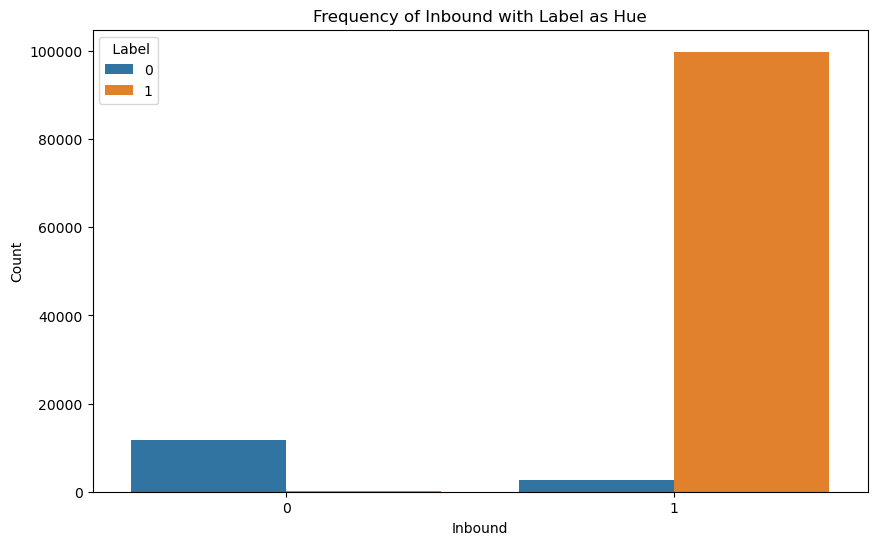

In [28]:
import seaborn as sns
import matplotlib.pyplot as plt

# Assuming your dataframe is named 'df'
plt.figure(figsize=(10, 6))
sns.countplot(data=balanced_data, x=' Inbound', hue=' Label')
plt.title('Frequency of Inbound with Label as Hue')
plt.xlabel('Inbound')
plt.ylabel('Count')
plt.show()


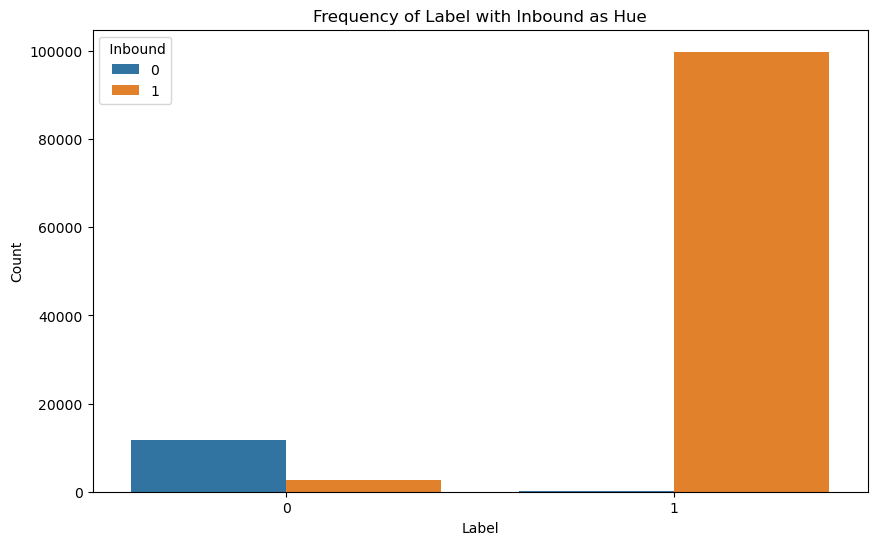

In [29]:
import seaborn as sns
import matplotlib.pyplot as plt

# Assuming your dataframe is named 'df'
plt.figure(figsize=(10, 6))
sns.countplot(data=balanced_data, x=' Label', hue=' Inbound')
plt.title('Frequency of Label with Inbound as Hue')
plt.xlabel('Label')
plt.ylabel('Count')
plt.show()


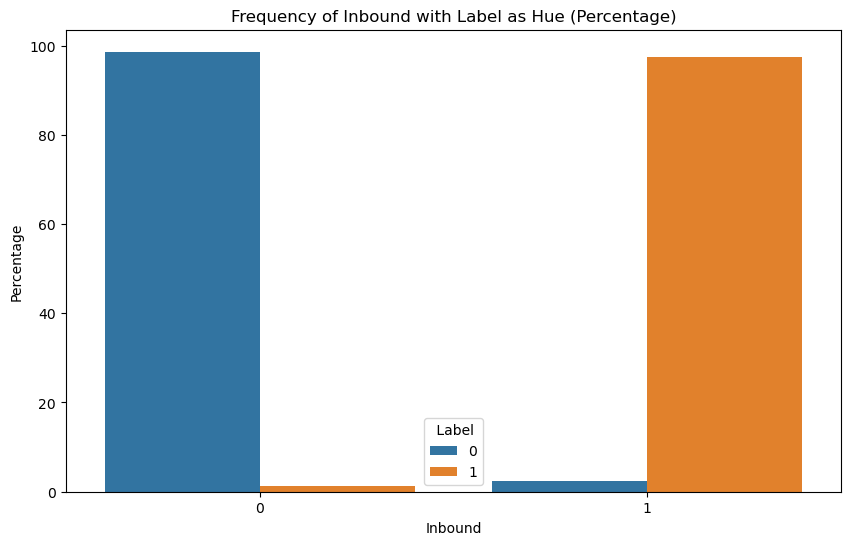

In [30]:
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np

# Assuming your dataframe is named 'df'
inbound_label_counts = balanced_data.groupby([' Inbound', ' Label']).size().reset_index(name='Count')
total_counts = balanced_data.groupby([' Inbound']).size().reset_index(name='Total_Count')

inbound_label_counts = inbound_label_counts.merge(total_counts, on=' Inbound')
inbound_label_counts['Percentage'] = (inbound_label_counts['Count'] / inbound_label_counts['Total_Count']) * 100

plt.figure(figsize=(10, 6))
sns.barplot(data=inbound_label_counts, x=' Inbound', y='Percentage', hue=' Label')
plt.title('Frequency of Inbound with Label as Hue (Percentage)')
plt.xlabel('Inbound')
plt.ylabel('Percentage')
plt.show()


In [31]:
inbound_label_counts

,Inbound,Label,Count,Total_Count,Percentage
0,0,0,11789,11953,98.62796
1,0,1,164,11953,1.37204
2,1,0,2576,102412,2.51533
3,1,1,99836,102412,97.48467


In [32]:

# Split the data into train and test sets
X = balanced_data.drop([' Inbound',' Label'], axis=1)
y = balanced_data[' Label']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3,stratify = y, random_state=42)



In [33]:
X_train.isnull().sum().sum()

19

In [34]:
import numpy as np

def check_data_issues(data):
    # Check for NaN values
    if data.isnull().values.any():
        print("There are NaN values in the dataset.")

    # Check for infinite values
    if np.isinf(data).values.any():
        print("There are infinite values in the dataset.")

    # Check for extremely large values
    max_value = data.max().max()
    if max_value > np.finfo(np.float64).max:
        print(f"There are values too large for dtype('float64') in the dataset. Max value: {max_value}")

    # Check for extremely small values
    min_value = data.min().min()
    if min_value < np.finfo(np.float64).min:
        print(f"There are values too small for dtype('float64') in the dataset. Min value: {min_value}")

# Check the training and testing data for any issues
check_data_issues(X_train)
check_data_issues(X_test)


There are NaN values in the dataset.
There are infinite values in the dataset.
There are values too large for dtype('float64') in the dataset. Max value: inf
There are NaN values in the dataset.
There are infinite values in the dataset.
There are values too large for dtype('float64') in the dataset. Max value: inf


In [35]:
# Replace infinity values with NaN
X_train.replace([np.inf, -np.inf], np.nan, inplace=True)
X_test.replace([np.inf, -np.inf], np.nan, inplace=True)

# Impute NaN values with the mean of the corresponding column
from sklearn.impute import SimpleImputer

imputer = SimpleImputer(missing_values=np.nan, strategy='mean')
X_train = imputer.fit_transform(X_train)
X_test = imputer.transform(X_test)

# Now, standardize the data
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)


In [36]:
import pandas as pd
from sklearn.metrics import accuracy_score, f1_score, classification_report

# Create an empty DataFrame with the desired columns
model_comparison = pd.DataFrame(columns=["Model", "Accuracy", "F1 Score"])

# Train and evaluate machine learning models
models = {
    "Logistic Regression": LogisticRegression(max_iter=1000),
    "Random Forest": RandomForestClassifier(),
    "Support Vector Machine": SVC()
}

for name, model in models.items():
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)

    # Calculate metrics
    accuracy = accuracy_score(y_test, y_pred)
    f1 = f1_score(y_test, y_pred, average='weighted')

    # Append the metrics to the DataFrame
    model_comparison = model_comparison.append({"Model": name, "Accuracy": accuracy, "F1 Score": f1}, ignore_index=True)

    print(f"{name}:")
    print(f"Accuracy: {accuracy}")
    print(f"F1 score: {f1}")
    print(classification_report(y_test, y_pred))
    print("\n")

# Display the comparison DataFrame
model_comparison

/tmp/ipykernel_12113/3989400141.py:23: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  model_comparison = model_comparison.append({"Model": name, "Accuracy": accuracy, "F1 Score": f1}, ignore_index=True)


Logistic Regression:
Accuracy: 0.9983386767706208
F1 score: 0.9983392538526517
              precision    recall  f1-score   support

           0       0.99      0.99      0.99      4310
           1       1.00      1.00      1.00     30000

    accuracy                           1.00     34310
   macro avg       1.00      1.00      1.00     34310
weighted avg       1.00      1.00      1.00     34310





/tmp/ipykernel_12113/3989400141.py:23: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  model_comparison = model_comparison.append({"Model": name, "Accuracy": accuracy, "F1 Score": f1}, ignore_index=True)


Random Forest:
Accuracy: 1.0
F1 score: 1.0
              precision    recall  f1-score   support

           0       1.00      1.00      1.00      4310
           1       1.00      1.00      1.00     30000

    accuracy                           1.00     34310
   macro avg       1.00      1.00      1.00     34310
weighted avg       1.00      1.00      1.00     34310



Support Vector Machine:
Accuracy: 0.9996793937627514
F1 score: 0.999679568670891
              precision    recall  f1-score   support

           0       1.00      1.00      1.00      4310
           1       1.00      1.00      1.00     30000

    accuracy                           1.00     34310
   macro avg       1.00      1.00      1.00     34310
weighted avg       1.00      1.00      1.00     34310





/tmp/ipykernel_12113/3989400141.py:23: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  model_comparison = model_comparison.append({"Model": name, "Accuracy": accuracy, "F1 Score": f1}, ignore_index=True)


,Model,Accuracy,F1 Score
0,Logistic Regression,0.998339,0.998339
1,Random Forest,1.000000,1.000000
2,Support Vector Machine,0.999679,0.999680


In [37]:
feature_columns = X.columns

# Get the Random Forest model from the 'models' dictionary
random_forest_model = models['Random Forest']

# Get feature importances
importances = random_forest_model.feature_importances_

# Create a DataFrame with the feature names and their corresponding importances
feature_importances = pd.DataFrame({'Feature': feature_columns, 'Importance': importances})

# Sort the DataFrame by importance in descending order
feature_importances = feature_importances.sort_values(by='Importance', ascending=False)

# Display the feature importances DataFrame
# Filter the DataFrame to show only features with non-zero importance
non_zero_importances = feature_importances[feature_importances['Importance'] > 0]

# Display the filtered DataFrame
non_zero_importances


,Feature,Importance
0,Source IP,1.365988e-01
12,Fwd Packet Length Min,1.231258e-01
43,Min Packet Length,1.111931e-01
57,Average Packet Size,8.678500e-02
2,Destination IP,6.994691e-02
...,...,...
79,Idle Mean,2.519354e-05
49,SYN Flag Count,6.872808e-06
76,Active Std,5.945668e-06
39,Fwd Header Length,1.727363e-06


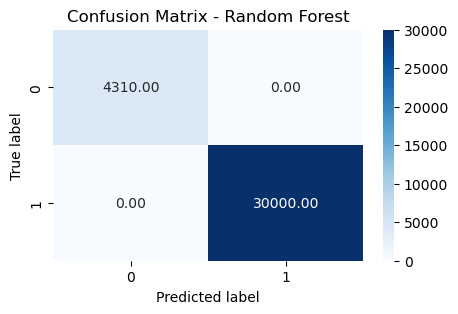

In [38]:
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix

# Choose the model you want to use, for example, Random Forest
model = models["Random Forest"]
y_pred = model.predict(X_test)

# Calculate the confusion matrix
cm = confusion_matrix(y_test, y_pred)

# Plot the confusion matrix using seaborn's heatmap
plt.figure(figsize=(5, 3))
sns.heatmap(cm, annot=True, fmt=".2f", cmap="Blues", xticklabels=["0", "1"], yticklabels=["0", "1"])
plt.ylabel("True label")
plt.xlabel("Predicted label")
plt.title("Confusion Matrix - Random Forest")
plt.show()
